# <font color = 'yellow'><b>Simple Linear Regression</b></font>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Here is the salary datasets, in which two columns are given years_of_experience and salary, and we need to create a model to predict the salary of the employee based on the years of experience he/she has. 

A very good example of simple linear regression

In [7]:
df = pd.read_csv("Datasets/Salary_Data.csv")

In [8]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [10]:
df.shape

(30, 2)

In [11]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [12]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: title={'center': 'Years of Experience vs Salary'}, xlabel='YearsExperience'>

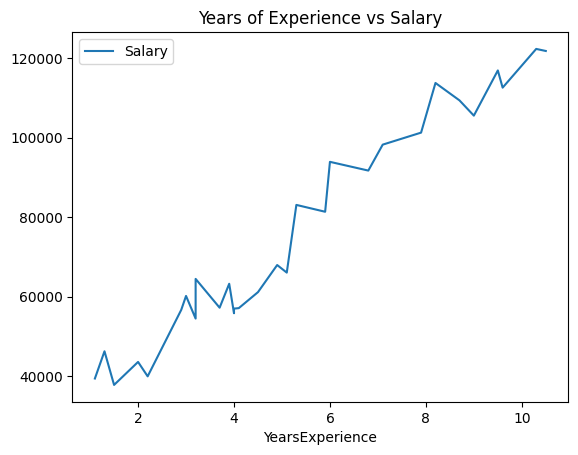

In [16]:
df.plot(kind='line', x='YearsExperience', y='Salary', title='Years of Experience vs Salary')
# the plot function is available in pandas to plot the data, the first argument is the type of plot, the second argument is the x-axis and the third argument is the y-axis

here we can see the plot is linear means the salary is increasing with years of experience, so we can use linear regression here

In [17]:
# extract the values of the columns
X = df['YearsExperience'].values 
y = df['Salary'].values 
X, y

# dont think why we choose X, and y, consider it as convention, you will get to know it later

(array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
         4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
         7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
         54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
         61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
         98273., 101302., 113812., 109431., 105582., 116969., 112635.,
        122391., 121872.]))

In [18]:
X.shape, y.shape

((30,), (30,))

In [19]:
# we need to reshape it to 2D array
X = X.reshape(X.shape[0], 1)
y = y.reshape(y.shape[0], 1)

In [20]:
# splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=2)

In [21]:
# X_train

In [11]:
X_test

array([[1.3],
       [1.1],
       [4.5],
       [3.7],
       [7.1],
       [6. ]])

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression() # creating an object of LinearRegression class

In [25]:
reg.fit(X_train, y_train) # training the model

LinearRegression()

In [26]:
y_pre = reg.predict(X_test) # predicting the values
y_test

array([[46205.],
       [39343.],
       [61111.],
       [57189.],
       [98273.],
       [93940.]])

In [27]:
# checking the error 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pre)

56137509.9978255

In [28]:
reg.coef_ # slope of the line (m in y=mx+c)

array([[9569.58688543]])

In [29]:
reg.intercept_ # intercept of the line (c in y=mx+c)

array([24393.16915195])

In [31]:
reg.score(X, y)

0.9560010886264938

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pre)

0.8886956733784565

In [35]:
# R - squared value is the value of the coefficient of determination, which is a statistical measure of how well the regression predictions approximate the real data points.
# the more it nearer to 1, the better the model is. nearer to zero means the model is not good. and if it is negative then the model is completely wrong.

# here our model is 88% accurate